# S04 T01: Visualització gràfica d'un dataset

 Exercici 1
Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv ("data\DelayedFlights.csv")
df=df[df["AirTime"]>10]
dfA=df.loc[:,('UniqueCarrier','Origin', 'Dest','AirTime', 'ArrDelay','DepDelay','Distance','TaxiIn', 'TaxiOut', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay')]
dfA

,UniqueCarrier,Origin,Dest,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,WN,IAD,TPA,116.0,-14.0,8.0,810,4.0,8.0,NaN,NaN,NaN,NaN
1,WN,IAD,TPA,113.0,2.0,19.0,810,5.0,10.0,NaN,NaN,NaN,NaN
2,WN,IND,BWI,76.0,14.0,8.0,515,3.0,17.0,NaN,NaN,NaN,NaN
3,WN,IND,BWI,77.0,34.0,34.0,515,3.0,10.0,0.0,0.0,0.0,32.0
4,WN,IND,JAX,87.0,11.0,25.0,688,4.0,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,DL,MSP,ATL,120.0,25.0,30.0,906,9.0,18.0,0.0,0.0,0.0,22.0
1936754,DL,RIC,ATL,78.0,75.0,57.0,481,15.0,34.0,57.0,18.0,0.0,0.0
1936755,DL,ATL,IAH,122.0,99.0,80.0,689,8.0,32.0,0.0,19.0,0.0,79.0
1936756,DL,IAD,ATL,89.0,9.0,11.0,533,13.0,13.0,NaN,NaN,NaN,NaN


**Una variable categòrica (UniqueCarrier)**

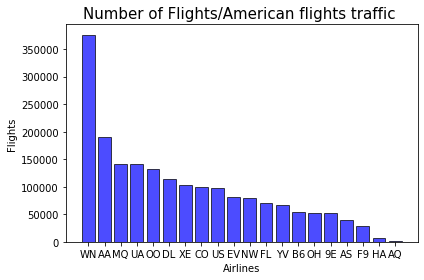

In [12]:
import matplotlib.pyplot as plt

dfUniqueCarrier=dfA['UniqueCarrier'].value_counts()

x=dfUniqueCarrier.index
y=dfUniqueCarrier.values

width = 0.5  
fig, ax = plt.subplots()
ax.bar(x, y,alpha=0.7,edgecolor='black',color='blue')

ax.set_ylabel('Flights')
ax.set_xlabel('Airlines')
ax.set_title('Number of Flights/American flights traffic ', fontsize = 15)

fig.tight_layout()

plt.savefig('data/Number of Flights.png')
plt.show()


In [5]:
dfUniqueCarrier=dfA['UniqueCarrier'].value_counts()
dfUniqueCarrier.index

Index(['WN', 'AA', 'MQ', 'UA', 'OO', 'DL', 'XE', 'CO', 'US', 'EV', 'NW', 'FL',
       'YV', 'B6', 'OH', '9E', 'AS', 'F9', 'HA', 'AQ'],
      dtype='object')

**Una variable numèrica (ArrDelay)**

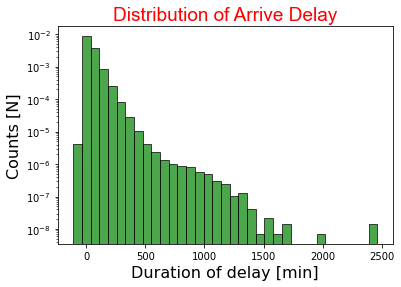

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
dfArrDelay=dfA['ArrDelay']
x=dfArrDelay.values
ax.hist(x, bins=35, density=True, edgecolor = 'black',color="green", alpha=0.7, linewidth = 1)
 
ax.set_title('Distribution of Arrive Delay',fontname="Arial", color="red",fontsize = 19)

ax.set_xlabel("Duration of delay [min]",fontsize = 16)
ax.set_ylabel("Counts [N]",fontsize = 16)
ax.set_yscale('log')

plt.savefig('data/Distribution of Arrive Delay.png')
plt.show()

**Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)**

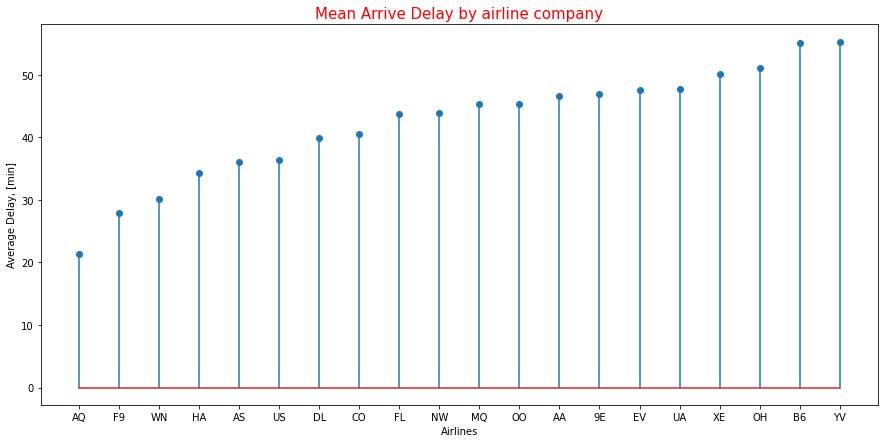

In [4]:
dfArrDelayUniqueCarrier=dfA.groupby("UniqueCarrier").agg({"ArrDelay":np.mean}).reset_index()
dfArrDelayUniqueCarrier.sort_values("ArrDelay", inplace=True)
y=dfArrDelayUniqueCarrier['ArrDelay']
x=dfArrDelayUniqueCarrier['UniqueCarrier']

fig, ax = plt.subplots(figsize=(15, 7))

ax.set_ylabel('Average Delay, [min]')
ax.set_xlabel('Airlines')
ax.set_title('Mean Arrive Delay by airline company', color="red", fontsize = 15)
ax.stem(x,y)
#plt.tight_layout()


plt.savefig('data/Mean Arrive Delay by airline company.png')

plt.show()


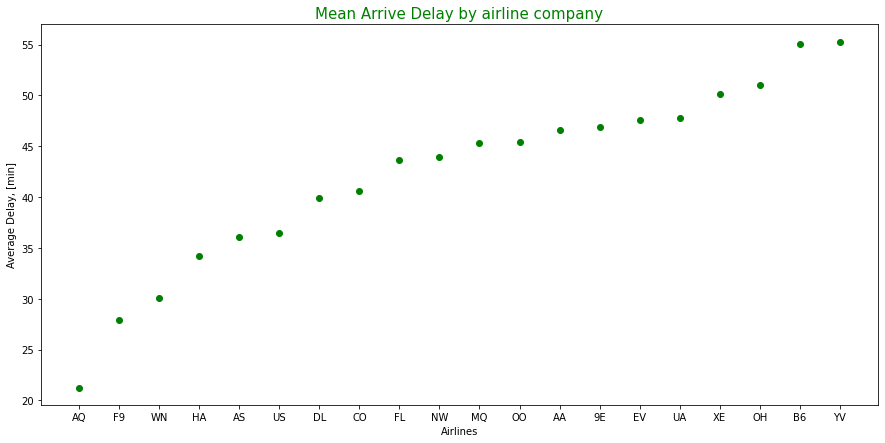

In [5]:
dfArrDelayUniqueCarrier=dfA.groupby("UniqueCarrier").agg({"ArrDelay":np.mean}).reset_index()
dfArrDelayUniqueCarrier.sort_values("ArrDelay", inplace=True)
y=dfArrDelayUniqueCarrier['ArrDelay']
x=dfArrDelayUniqueCarrier['UniqueCarrier']

fig, ax = plt.subplots(figsize=(15, 7))


ax.scatter(x,y, color='green', lw=1)
ax.set_ylabel('Average Delay, [min]')
ax.set_xlabel('Airlines')
ax.set_title('Mean Arrive Delay by airline company', color="green", fontsize = 15)
plt.savefig('data/Mean Arrive Delay by airline company2.png')

plt.show()

**Dues variables numèriques (ArrDelay i DepDelay)**

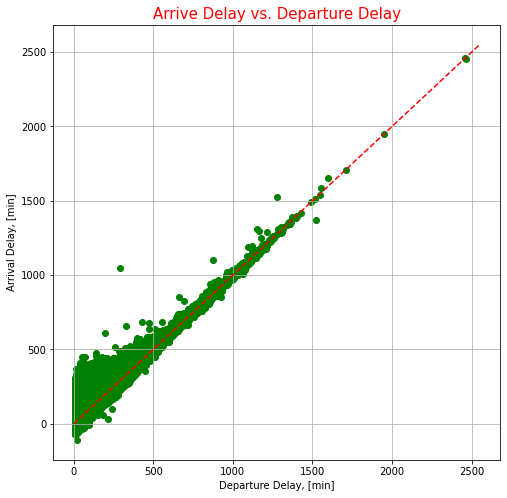

In [6]:
dfArrDelayDepDelay=dfA[["UniqueCarrier","ArrDelay","DepDelay"]]
#.groupby(["UniqueCarrier"]).agg({"ArrDelay":sum,"DepDelay":sum}).reset_index()

y=dfArrDelayDepDelay['ArrDelay']
x=dfArrDelayDepDelay['DepDelay']
fig, ax = plt.subplots(figsize=(8, 8))


ax.scatter(x,y, color='green', lw=1)
ax.plot([0,2550], [0,2550], '--', color='red')

ax.set_xlabel('Departure Delay, [min]')
ax.set_ylabel('Arrival Delay, [min]')
ax.set_title('Arrive Delay vs. Departure Delay', color="red", fontsize = 15)
ax.grid()
plt.savefig('data/Arrive Delay vs. Departure Delay.png')
plt.show()


**Tres variables (ArrDelay, DepDelay i UniqueCarrier)**

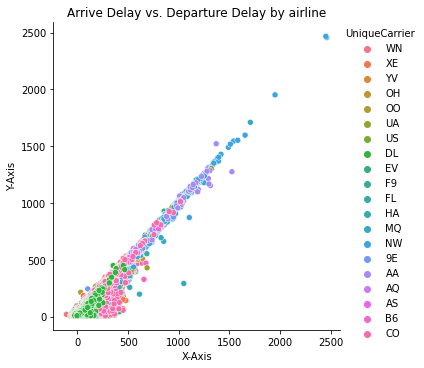

In [7]:
import seaborn as sns

dfArrDelayDepDelay=dfA[["UniqueCarrier","ArrDelay","DepDelay"]]

x=dfArrDelayDepDelay["ArrDelay"]
y=dfArrDelayDepDelay["DepDelay"]
hue=dfArrDelayDepDelay["UniqueCarrier"]

ax=sns.relplot(x="ArrDelay", y="DepDelay", hue="UniqueCarrier", data=dfArrDelayDepDelay).set(title='Arrive Delay vs. Departure Delay by airline')
#g.map(plt.axhline).set_axis_labels("Departure Delay, [min]", "'Arrival Delay, [min]")
ax.set( xlabel = "X-Axis", ylabel = "Y-Axis")
plt.savefig('data/Arrive Delay vs. Departure Delay by airline.png')

**Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)**

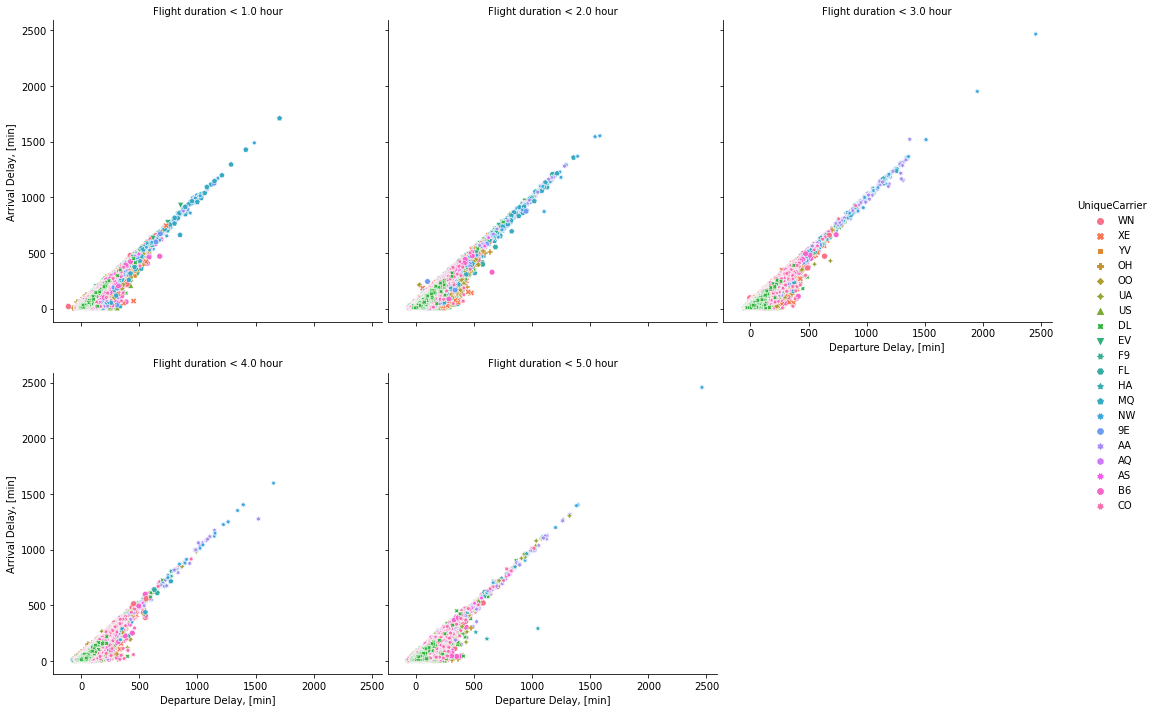

In [8]:
dfA["AirTimeGr"]=dfA.apply(lambda x: x["AirTime"]//60+1, axis=1)
dfA["AirTimeGr"]=dfA["AirTimeGr"].apply(lambda x: x if x<5 else 5)
df4=dfA[["UniqueCarrier","AirTimeGr","ArrDelay","DepDelay"]]

x4=df4["ArrDelay"]
y4=df4["DepDelay"]
hue4=df4["UniqueCarrier"]
col=df4["AirTimeGr"]               
ax=sns.relplot(x=x4, y=y4, hue=hue4, style=hue4,
            col=col, col_wrap=3,
               data=df4).set(title='Delay vs. flight duration')
(ax.map(plt.axhline, color="1", zorder=0)
 .set_axis_labels("Departure Delay, [min]", "Arrival Delay, [min]")
  .set_titles("Flight duration < {col_name} hour")
  .tight_layout(w_pad=0,h_pad=2))
plt.savefig('data/Delay vs. flight duration.png')
